In [491]:
import pandas as pd
import seaborn as sb
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-dark')
print(plt.style.available)


['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


#### 1. Load data and get an overview of the data

In [301]:
col_names = ['id_str','created_at','text','user_created_at','user_location',
            'user_followers_count','user_friends_count', 'longitude','latitude','retweet_count','favorite_count']

In [113]:
# datatype = [np.object, np.object, np.object, np.object, np.object, np.int32, np.int32, np.object, np.object, np.int32, np.int32]

In [357]:
# data_type = {'id_str': np.object,'created_at': np.object,'text': np.object,'user_created_at': np.object,'user_location': np.object,
#              'user_followers_count': np.int32,'user_friends_count': np.float64, 'longitude': np.object,'latitude':np.object,
#              'retweet_count': np.int32,'favorite_count': np.float64}

In [360]:
three_com = pd.read_csv("TwitterThreeCom.txt", delimiter='\t', header=None, names = col_names)

In [361]:
three_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330932 entries, 0 to 330931
Data columns (total 11 columns):
id_str                  330876 non-null object
created_at              330927 non-null object
text                    330826 non-null object
user_created_at         330927 non-null object
user_location           330904 non-null object
user_followers_count    330844 non-null object
user_friends_count      330845 non-null float64
longitude               330763 non-null object
latitude                330763 non-null object
retweet_count           330763 non-null object
favorite_count          330763 non-null float64
dtypes: float64(2), object(9)
memory usage: 27.8+ MB


In [364]:
missing_value = three_com.isnull().sum()
missing_value

id_str                   56
created_at                5
text                    106
user_created_at           5
user_location            28
user_followers_count     88
user_friends_count       87
longitude               169
latitude                169
retweet_count           169
favorite_count          169
dtype: int64

###### Since the number of missing value is small compared to the total dataset, below I will make a copy and delete the rows with missing values.

In [305]:
three_com.head(3)

,id_str,created_at,text,user_created_at,user_location,user_followers_count,user_friends_count,longitude,latitude,retweet_count,favorite_count
0,1170949918107865090,2019-09-09 06:39:50,550/- . . . . . . Catalog Name: *Yashvi Stylis...,2019-08-08 05:54:31,None,1,21.0,None,None,0,0.0
1,1170949918455820288,2019-09-09 06:39:50,RT : Me: Twitter-60% WhatsApp-20% Instagram-15...,2018-12-28 05:23:51,"Kuala Terengganu, Malaysia",171,106.0,None,None,0,0.0
2,1170949918942531585,2019-09-09 06:39:50,"RT : Smile,God is in absolute control #StressFree",2017-09-04 04:53:20,ashaiman city,468,179.0,None,None,0,0.0


#### Make a copy for code testing

In [365]:
three_com1 = three_com.copy()

In [366]:
# three_com1.dropna(subset = ['text'], inplace = True)
three_com1.dropna(inplace = True)

In [367]:
three_com1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330651 entries, 0 to 330931
Data columns (total 11 columns):
id_str                  330651 non-null object
created_at              330651 non-null object
text                    330651 non-null object
user_created_at         330651 non-null object
user_location           330651 non-null object
user_followers_count    330651 non-null object
user_friends_count      330651 non-null float64
longitude               330651 non-null object
latitude                330651 non-null object
retweet_count           330651 non-null object
favorite_count          330651 non-null float64
dtypes: float64(2), object(9)
memory usage: 30.3+ MB


In [368]:
three_com1.isnull().sum()

id_str                  0
created_at              0
text                    0
user_created_at         0
user_location           0
user_followers_count    0
user_friends_count      0
longitude               0
latitude                0
retweet_count           0
favorite_count          0
dtype: int64

In [369]:
# three_com1[three_com1['user_followers_count'].str.contains('Maryland|Ryan')]

In [441]:
#three_com1['user_followers_count'].map(int)

In [374]:
"""
After exploring the data, I found out there are entries with string value ('Maryland' or 'Ryan') for feature 
"user_followers_count", which doesn't make sense. I deleted the entries considering the amount of such errors is small
"""

three_com2  = three_com1[~three_com1['user_followers_count'].str.contains('[A-Z]|\|', na=False)]


# three_com2['user_followers_count'] = three_com2['user_followers_count'].str.replace('||-//', '')
# three_com2['user_followers_count'] = three_com2three_com2['user_followers_count'].str.replace(' ||', '')


In [431]:
three_com2['created_at'] = pd.to_datetime(three_com2['created_at'])

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [377]:
three_com2['user_followers_count'] = pd.to_numeric(three_com2['user_followers_count'])

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [379]:
three_com2['retweet_count'] = pd.to_numeric(three_com2['retweet_count'])

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [432]:
three_com2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330642 entries, 0 to 330931
Data columns (total 11 columns):
id_str                  330642 non-null object
created_at              330642 non-null datetime64[ns]
text                    330642 non-null object
user_created_at         330642 non-null object
user_location           330642 non-null object
user_followers_count    330642 non-null float64
user_friends_count      330642 non-null float64
longitude               330642 non-null object
latitude                330642 non-null object
retweet_count           330642 non-null int64
favorite_count          330642 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 30.3+ MB


In [381]:
# data_type = {'id_str': np.object,'created_at': np.datetime64,'text': np.object,'user_created_at': np.datetime64,'user_location': np.object,
#             'user_followers_count': np.float64,'user_friends_count': np.float64, 'longitude': np.object,'latitude':np.object,
#              'retweet_count': np.float64,'favorite_count': np.float64}

# three_com2.astype(dtype = data_type, inplace = True)

In [433]:
total_tweets, total_features = three_com2.shape

In [434]:
three_com2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330642 entries, 0 to 330931
Data columns (total 11 columns):
id_str                  330642 non-null object
created_at              330642 non-null datetime64[ns]
text                    330642 non-null object
user_created_at         330642 non-null object
user_location           330642 non-null object
user_followers_count    330642 non-null float64
user_friends_count      330642 non-null float64
longitude               330642 non-null object
latitude                330642 non-null object
retweet_count           330642 non-null int64
favorite_count          330642 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 30.3+ MB


#### 2. Timeframe of the tweets

#### 3. Explore each followers and friends count for each subset

In [442]:
pinterest = three_com2[three_com1['text'].str.contains('pinterest')]
instagram = three_com2[three_com1['text'].str.contains('instagram')]
snapchat = three_com2[three_com1['text'].str.contains('snapchat')]

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [447]:
len(pinterest)

501

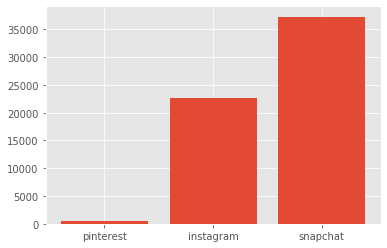

In [456]:
tweet_on_each_platform_count = [len(pinterest), len(instagram), len(snapchat)]

plt.bar([1,2,3], tweet_on_each_platform_count)
plt.xticks([1,2,3],['pinterest', 'instagram', 'snapchat']);


##### (1) Pinterest

In [435]:
pinterest = three_com2[three_com1['text'].str.contains('pinterest')]

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [436]:
pinterest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 96 to 330216
Data columns (total 11 columns):
id_str                  501 non-null object
created_at              501 non-null datetime64[ns]
text                    501 non-null object
user_created_at         501 non-null object
user_location           501 non-null object
user_followers_count    501 non-null float64
user_friends_count      501 non-null float64
longitude               501 non-null object
latitude                501 non-null object
retweet_count           501 non-null int64
favorite_count          501 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 47.0+ KB


In [385]:
pinterest.head(3)

,id_str,created_at,text,user_created_at,user_location,user_followers_count,user_friends_count,longitude,latitude,retweet_count,favorite_count
96,1170949988572024832,2019-09-09 06:40:07,pinterest is such a scary place to be,2010-01-21 11:02:47,🇰🇷x🇵🇭x🇺🇸,10464.0,1931.0,None,None,0,0.0
290,1170950098211287040,2019-09-09 06:40:33,RT : how we got to look up the right hairstyle...,2013-10-21 03:22:23,None,1487.0,989.0,None,None,0,0.0
476,1170950215697870848,2019-09-09 06:41:01,cr pinterest,2018-05-05 11:46:46,addicted to Doyoung,963.0,1065.0,None,None,0,0.0


In [437]:
pinterest.describe()

,user_followers_count,user_friends_count,retweet_count,favorite_count
count,501.000000,501.000000,501.0,501.0
mean,3337.019960,1590.550898,0.0,0.0
std,28476.433678,11261.563958,0.0,0.0
min,0.000000,0.000000,0.0,0.0
25%,105.000000,169.000000,0.0,0.0
50%,334.000000,351.000000,0.0,0.0
75%,901.000000,894.000000,0.0,0.0
max,569802.000000,228765.000000,0.0,0.0


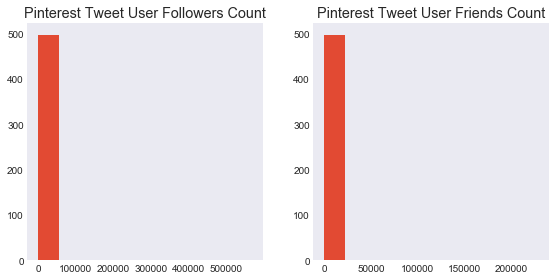

In [501]:
fig, axs = plt.subplots(1,2, figsize = (8,4))
axs[0].hist(pinterest['user_followers_count'])
# xlabels = list([np.arange(0, 600001, 100000)])
# axs[0].set_xticklabels(xlabels, rotation=45)
axs[0].set_title('Pinterest Tweet User Followers Count')

axs[1].hist(pinterest['user_friends_count'])
axs[1].set_title('Pinterest Tweet User Friends Count')

fig.tight_layout();

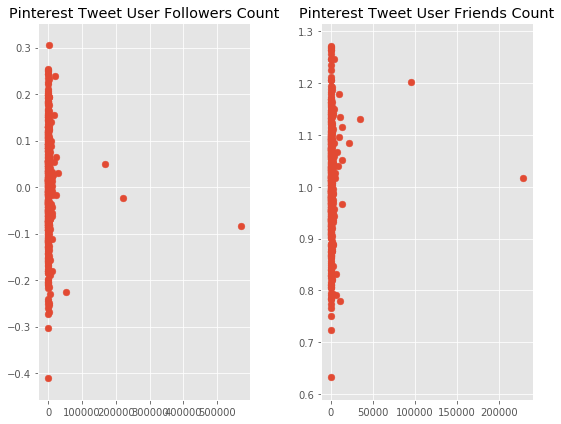

In [459]:
fig, axs = plt.subplots(1,2, figsize = (8,6))
axs[0].scatter(pinterest['user_followers_count'], np.repeat(0,len(pinterest['user_followers_count'])) 
               + np.random.normal(0, 0.1, len(pinterest['user_followers_count'])), s=45)
# xlabels = list([np.arange(0, 600000, 100000)])

# axs[0].set_xticklabels(xlabels, rotation=45)
axs[0].set_title('Pinterest Tweet User Followers Count')

axs[1].scatter(pinterest['user_friends_count'], np.repeat(0,len(pinterest['user_friends_count'])) 
               + np.random.normal(1, 0.1, len(pinterest['user_friends_count'])), s=45)
axs[1].set_title('Pinterest Tweet User Friends Count')

fig.tight_layout();

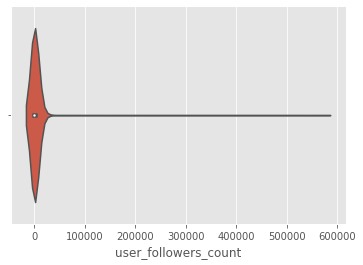

In [460]:
sb.violinplot(x=pinterest['user_followers_count'])

##### (2) Instagram

In [284]:
instagram = three_com2[three_com1['text'].str.contains('instagram')]

In [285]:
instagram.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 16 to 188689
Data columns (total 11 columns):
id_str                  11599 non-null object
created_at              11599 non-null object
text                    11599 non-null object
user_created_at         11599 non-null object
user_location           11599 non-null object
user_followers_count    11599 non-null object
user_friends_count      11599 non-null float64
longitude               11599 non-null object
latitude                11599 non-null object
retweet_count           11599 non-null object
favorite_count          11599 non-null float64
dtypes: float64(2), object(9)
memory usage: 1.1+ MB


In [506]:
instagram.describe()

,user_followers_count,user_friends_count,retweet_count,favorite_count
count,2.261200e+04,22612.000000,22612.0,22612.0
mean,3.074090e+03,983.878737,0.0,0.0
std,6.450601e+04,4998.169382,0.0,0.0
min,0.000000e+00,0.000000,0.0,0.0
25%,6.100000e+01,118.000000,0.0,0.0
50%,2.470000e+02,297.000000,0.0,0.0
75%,8.280000e+02,705.000000,0.0,0.0
max,7.386086e+06,278720.000000,0.0,0.0


##### (3) Snapchat

In [254]:
snapchat = three_com2[three_com1['text'].str.contains('snapchat')]

In [255]:
snapchat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11198 entries, 21 to 188696
Data columns (total 11 columns):
id_str                  11198 non-null object
created_at              11198 non-null object
text                    11198 non-null object
user_created_at         11198 non-null object
user_location           11198 non-null object
user_followers_count    11198 non-null object
user_friends_count      11198 non-null float64
longitude               11198 non-null object
latitude                11198 non-null object
retweet_count           11198 non-null object
favorite_count          11198 non-null float64
dtypes: float64(2), object(9)
memory usage: 1.0+ MB


In [508]:
snapchat.describe()

,user_followers_count,user_friends_count,retweet_count,favorite_count
count,3.726700e+04,37267.000000,37267.0,37267.0
mean,2.076231e+03,585.994445,0.0,0.0
std,2.654545e+04,2241.691192,0.0,0.0
min,0.000000e+00,0.000000,0.0,0.0
25%,7.400000e+01,120.000000,0.0,0.0
50%,2.360000e+02,267.000000,0.0,0.0
75%,6.030000e+02,565.000000,0.0,0.0
max,1.604430e+06,177635.000000,0.0,0.0


##### (4). Non-parametrics: Mann-Whitney signed rank test

In [502]:
pinterest_user_followers = pinterest['user_followers_count']
instagram_user_followers = instagram['user_followers_count']
snapchat_user_followers = snapchat['user_followers_count']

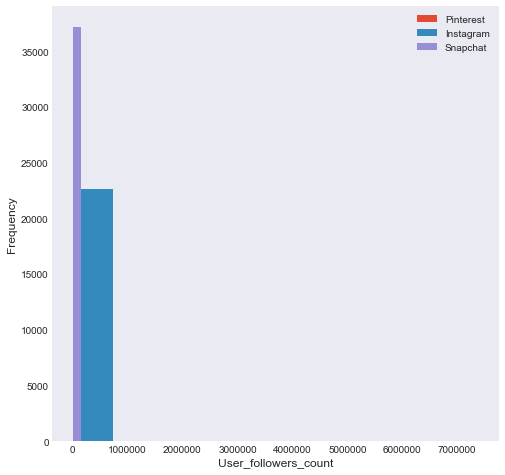

In [513]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.hist(pinterest_user_followers, label = 'Pinterest')
ax.hist(instagram_user_followers, label = 'Instagram')
ax.hist(snapchat_user_followers, label = 'Snapchat')

ax.set_xlabel('User_followers_count')
ax.set_ylabel('Frequency')

plt.legend();

In [504]:
"""
Null hypothesis: users of pinterest related tweets have same amount of followers users tweeting instagram related content.

Alpha = 0.05

"""

res = stats.mannwhitneyu(pinterest_user_followers, instagram_user_followers, alternative="two-sided")
print("p-value for pinterest_user_followers > instagram_user_followers: {:2.3f}".format(res.pvalue))

p-value for pinterest_user_followers > instagram_user_followers: 0.000


In [505]:
res = stats.mannwhitneyu(instagram_user_followers, snapchat_user_followers, alternative="two-sided")
print("p-value for pinterest_user_followers > instagram_user_followers: {:2.3f}".format(res.pvalue))

p-value for pinterest_user_followers > instagram_user_followers: 0.000


#### 4. Explore the users' location

In [461]:
three_com2[['longitude']].nunique(axis = 0)

longitude    15737
dtype: int64

In [462]:
three_com2[['latitude']].nunique(axis = 0)

latitude    15678
dtype: int64

In [77]:
#only less than 10% users share their exact location

In [478]:
three_com3 = three_com2[(three_com2['longitude'] != 'None') & (three_com2['latitude'] != 'None')]

In [483]:
three_com3['longitude'] = pd.to_numeric(three_com3['longitude'])
three_com3['latitude'] = pd.to_numeric(three_com3['latitude'])

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [472]:
import geopandas

# http://geopandas.org/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py

from shapely.geometry import Polygon

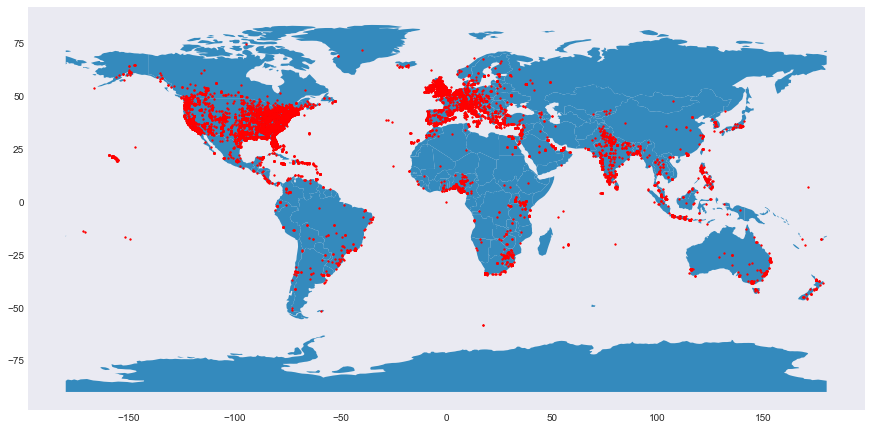

In [492]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(three_com3['longitude'], three_com3['latitude'])]
gdf = GeoDataFrame(three_com3, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 12)), marker='o', color='red', markersize=3);

##### User location for each subset -> the amount of data points is too small to make a informative plot

In [493]:
pinterest3 = three_com3[three_com3['text'].str.contains('pinterest')]
instagram3 = three_com3[three_com3['text'].str.contains('instagram')]
snapchat3 = three_com3[three_com3['text'].str.contains('snapchat')]

In [499]:
len(pinterest3), len(instagram3), len(snapchat3)

(2, 182, 13)

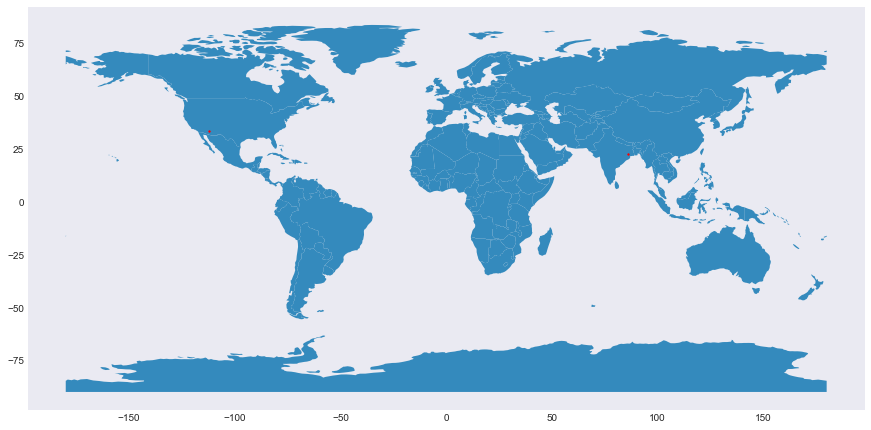

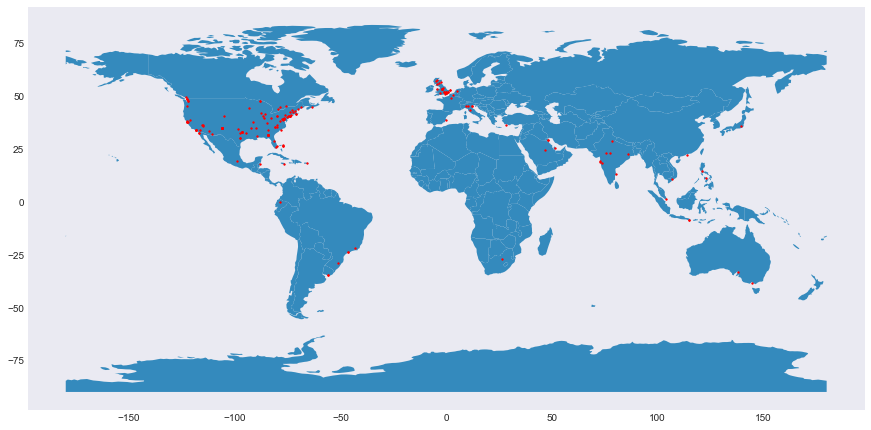

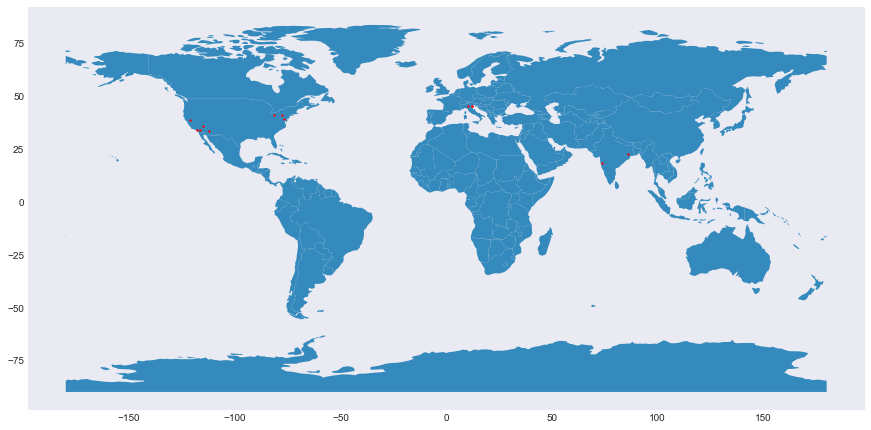

In [500]:
geometry_pinterest = [Point(xy) for xy in zip(pinterest3['longitude'], pinterest3['latitude'])]
geometry_instagram = [Point(xy) for xy in zip(instagram3['longitude'], instagram3['latitude'])]
geometry_snapchat = [Point(xy) for xy in zip(snapchat3['longitude'], snapchat3['latitude'])]

gdf_pinterest = GeoDataFrame(pinterest3, geometry=geometry_pinterest)   
gdf_instagram = GeoDataFrame(instagram3, geometry=geometry_instagram)
gdf_snapchat = GeoDataFrame(snapchat3, geometry=geometry_snapchat)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_pinterest.plot(ax=world.plot(figsize=(15, 12)), marker='o', color='red', markersize=3)
gdf_instagram.plot(ax=world.plot(figsize=(15, 12)), marker='o', color='red', markersize=3)
gdf_snapchat.plot(ax=world.plot(figsize=(15, 12)), marker='o', color='red', markersize=3);

In [259]:
import collections
location_counts = collections.Counter(three_com['user_location'])
location_counts

Counter({'None': 53813,
         'Kuala Terengganu, Malaysia': 1,
         'ashaiman city': 1,
         'Florida, USA': 525,
         'Rwanda': 45,
         'Seguin, TX': 5,
         'idk': 5,
         'Gyöngyös, Magyarország': 4,
         'India': 482,
         'NEW DELHI,  nizamuddin west ': 1,
         'Bulgaria': 41,
         'G.C.F in Tokyo': 1,
         'all stores nationwide': 8,
         'Get in my belly. - Fat Bastard': 1,
         'all around the world': 2,
         'Ötüken': 1,
         'GehnGehn Republic': 1,
         'Fortitude Valley, Brisbane': 1,
         'KCH': 1,
         'Houston, TX': 748,
         'United Kingdom': 771,
         'Hyderabad, India': 97,
         'Bedfordview, South Africa': 1,
         'National Capital Region, Repub': 13,
         'PVAMU': 1,
         'Newcastle Upon Tyne, England': 67,
         'Ker': 15,
         'Harbor Gateway, Los Angeles': 1,
         'Austin, TX': 264,
         'Jakarta Capital Region, Indone': 14,
         'Thailand': 148,


In [88]:
np.sum(list(location_counts.values()))

101729

#### 5. Sentiment analysis

In [222]:
import re
def deEmojify(text):
    if text:
        return text.encode('ascii', 'ignore').decode('ascii')
    else:
        return None
    
def clean_tweet(tweet): 
    ''' 
    Use sumple regex statemnents to clean tweet text by removing links and special characters
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) \
                                |(\w+:\/\/\S+)", " ", tweet).split())

In [266]:

a = '123Use 45sumple regex statemnents to clean tweet text'
print(re.sub('(^0-9)', '1', a))

123Use 45sumple regex statemnents to clean tweet text


In [223]:

txt = "pinterest is such a scary place to be \\\ + 1"
' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) \ |(\w+:\/\/\S+)", " ", txt).split())

'pinterest is such a scary place to be \\\\ + 1'

In [79]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment(sentence):    
    sentiment = SentimentIntensityAnalyzer()
    score = sentiment.polarity_scores(sentence)
    return score  

In [91]:
# for tweet in three_com['text']:
#     print(tweet, sentiment(tweet))
sentiment_analysis_result = []

for tweet in three_com['text']:
    sentiment_analysis_result.append([sentiment(tweet)['neg'], sentiment(tweet)['neu'], sentiment(tweet)['pos'], sentiment(tweet)['compound']])
    
sentiment_analysis_result[:5]
    

KeyboardInterrupt: 

In [ ]:
sentiment_names = ['tweet', 'negative_value', 'neutral_value', 'positive_value', 'compound_value']
sentiment_analysis_result = pd.DataFrame(sentiment_analysis_result, names = sentiment_names)

In [ ]:
sentiment_analysis_result = [three_com['text'],]